In [1]:
import os
import sys
import DisplayCT
import matplotlib.pyplot as plt
import numpy as np 
import copy
import plotly

In [2]:
path = "/home/crcrewso/Documents/Work Materials/TBI Python/S143324-Concantenated/"
patient_dicom = DisplayCT.load_scan(path)
patient_pixels = DisplayCT.get_pixels_hu(patient_dicom)

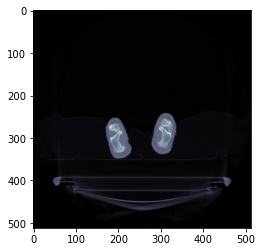

In [3]:
plt.imshow(patient_pixels[326], cmap=plt.cm.bone)

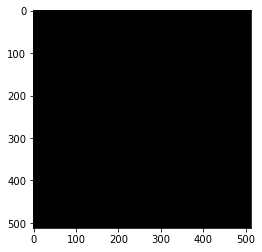

In [4]:
# get masks 
segmented_lungs = DisplayCT.segment_lung_mask(patient_pixels,    
                  fill_lung_structures=False)
segmented_lungs_fill = DisplayCT.segment_lung_mask(patient_pixels,     
                       fill_lung_structures=True)
internal_structures = segmented_lungs_fill - segmented_lungs
# isolate lung from chest
copied_pixels = copy.deepcopy(patient_pixels)
for i, mask in enumerate(segmented_lungs_fill): 
    get_high_vals = mask == 0
    copied_pixels[i][get_high_vals] = 0
seg_lung_pixels = copied_pixels
# sanity check
plt.imshow(seg_lung_pixels[326], cmap=plt.cm.bone)

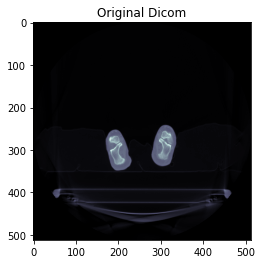

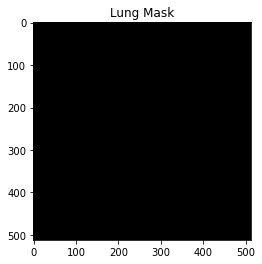

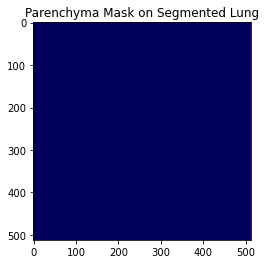

In [5]:
# pick random slice 
slice_id = 326
plt.figure(1)
plt.title('Original Dicom')
plt.imshow(patient_pixels[slice_id], cmap=plt.cm.bone)
plt.figure(2)
plt.title('Lung Mask')
plt.imshow(segmented_lungs_fill[slice_id], cmap=plt.cm.bone)
plt.figure(3)
plt.title('Parenchyma Mask on Segmented Lung')
plt.imshow(seg_lung_pixels[slice_id], cmap=plt.cm.bone)
plt.imshow(internal_structures[slice_id], cmap='jet', alpha=0.7)

In [6]:
# slide through dicom images using a slide bar 
plt.figure(1)
from ipywidgets.widgets import *
interact(dicom_animation, x=(0, len(patient_dicom)-1))

NameError: name 'dicom_animation' is not defined

<Figure size 432x288 with 0 Axes>

In [7]:
import vtkplotter

ModuleNotFoundError: No module named 'vtkplotter'